**Simulating a neural network for an XOR Gate**

_Importing Libraries_

In [213]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

_Creating a dataset for XOR training. Here,C1 represents first input to XOR and C2 represents second input._

In [225]:
dataset = np.array([[1,1,-1],[1,-1,1],[-1,1,1],[-1,-1,-1]])
for i, item in enumerate(dataset):
    print(i, item)

0 [ 1  1 -1]
1 [ 1 -1  1]
2 [-1  1  1]
3 [-1 -1 -1]


_Dividing the data into training_variables set **_x_** and ouput_variables set **_y_**_

In [235]:
x = dataset[:, 0:2]
y = dataset[:, 2:]

_The datasets x and y look something like this_

In [236]:
for i in range(4):
    print(x[i], y[i])

[1 1] [-1]
[ 1 -1] [1]
[-1  1] [1]
[-1 -1] [-1]


_Defining the sigmoid and sigmoid prime functions which we would be using later in the algorithm_

In [237]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))
def sigmoid_prime(z):
    return -(np.exp(-z)/np.multiply((1+np.exp(-z)),(1+np.exp(-z))))
    

_An intuition of how these functions behave could be seen from the following curve_

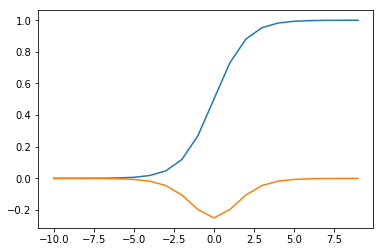

In [238]:
plt.plot(np.array([i for i in range(-10,10)]), sigmoid(np.array([i for i in range(-10, 10)])))
plt.plot(np.array([i for i in range(-10,10)]), sigmoid_prime(np.array([i for i in range(-10,10)])))

**_THE ALGORITHM_**

In [239]:
learning_rate = 1e-2

#Initializing weights
#The first element denotes neurons of lth layer and the second denotes neurons of (l-1)th layer
w1 = np.random.rand(2,2) 
w2 = np.random.rand(1,2) 

#Initializing biases
#It represents the bias for neurons of a given layer
b1 = np.random.rand(2)
b2 = np.random.rand(1)

#d is a list which stores the value of loss function for each updation of wts. and biases
d = []

In [240]:
#from IPython.core.debugger import set_trace
for i in range(10000):
    h = (w1.dot(x.T)).T+b1          # h is the weighted sum
    a = sigmoid(h)                  # a is the activation from the weighted sum
    yin = (w2.dot(a.T)).T+b2        # yin is the weighted sum of next layer
    y_pred = sigmoid(yin)           # y_pred is the activation of this layer

    loss = sum(-y*(np.log10(y_pred))-(1-y)*(np.log10(1-y_pred)))*0.25     # We're using cross-entropy loss 
    d.append(loss)
    print(i,loss)

    # Finding gradients and backpropagating it through layers
    grad_yin = (y_pred-y)           # grad_yin is delta_L

    grad_w2 = grad_yin.T.dot(a)     # grad_w2 is the delta_loss/delta_w2
    grad_b2 = grad_yin              # grad_b2 is the delta_loss/delta_b2
    grad_h = (grad_yin.dot(w2))*sigmoid_prime(h)    
    grad_w1 = sum(grad_h*x)
    grad_b1 = sum(grad_h)

    
    # Updating weights
    w1 = w1 - learning_rate * grad_w1
    b1 = b1 - learning_rate * grad_b1
    w2 = w2 - learning_rate * grad_w2
    b2 = b2 - learning_rate * grad_b2


0 [0.65022978]
1 [0.63435019]
2 [0.61863297]
3 [0.60308278]
4 [0.587704]
5 [0.57250074]
6 [0.55747678]
7 [0.5426356]
8 [0.52798035]
9 [0.51351387]
10 [0.49923864]
11 [0.48515684]
12 [0.47127026]
13 [0.45758039]
14 [0.44408838]
15 [0.43079502]
16 [0.41770081]
17 [0.4048059]
18 [0.39211015]
19 [0.37961311]
20 [0.36731403]
21 [0.35521191]
22 [0.34330547]
23 [0.33159318]
24 [0.32007329]
25 [0.30874382]
26 [0.2976026]
27 [0.28664727]
28 [0.2758753]
29 [0.26528401]
30 [0.25487057]
31 [0.24463206]
32 [0.23456541]
33 [0.22466751]
34 [0.21493514]
35 [0.20536501]
36 [0.1959538]
37 [0.18669816]
38 [0.17759467]
39 [0.16863994]
40 [0.15983055]
41 [0.15116308]
42 [0.14263414]
43 [0.13424034]
44 [0.12597833]
45 [0.11784477]
46 [0.10983638]
47 [0.10194991]
48 [0.09418217]
49 [0.08653001]
50 [0.07899033]
51 [0.07156009]
52 [0.06423632]
53 [0.0570161]
54 [0.04989658]
55 [0.04287497]
56 [0.03594853]
57 [0.02911462]
58 [0.02237064]
59 [0.01571406]
60 [0.00914241]
61 [0.0026533]
62 [-0.00375561]
63 [-0.010

495 [-1.52604276]
496 [-1.52913896]
497 [-1.53223425]
498 [-1.53532863]
499 [-1.53842209]
500 [-1.54151462]
501 [-1.54460621]
502 [-1.54769683]
503 [-1.55078649]
504 [-1.55387517]
505 [-1.55696285]
506 [-1.56004953]
507 [-1.5631352]
508 [-1.56621983]
509 [-1.56930342]
510 [-1.57238597]
511 [-1.57546744]
512 [-1.57854784]
513 [-1.58162714]
514 [-1.58470534]
515 [-1.58778242]
516 [-1.59085838]
517 [-1.59393319]
518 [-1.59700684]
519 [-1.60007933]
520 [-1.60315063]
521 [-1.60622074]
522 [-1.60928963]
523 [-1.61235731]
524 [-1.61542374]
525 [-1.61848893]
526 [-1.62155285]
527 [-1.6246155]
528 [-1.62767685]
529 [-1.63073689]
530 [-1.63379562]
531 [-1.63685301]
532 [-1.63990906]
533 [-1.64296374]
534 [-1.64601704]
535 [-1.64906896]
536 [-1.65211946]
537 [-1.65516855]
538 [-1.65821621]
539 [-1.66126241]
540 [-1.66430715]
541 [-1.66735041]
542 [-1.67039218]
543 [-1.67343244]
544 [-1.67647117]
545 [-1.67950837]
546 [-1.68254402]
547 [-1.6855781]
548 [-1.68861059]
549 [-1.69164149]
550 [-1.69467

958 [-2.78812253]
959 [-2.79071849]
960 [-2.7933144]
961 [-2.79591025]
962 [-2.79850605]
963 [-2.80110179]
964 [-2.80369747]
965 [-2.8062931]
966 [-2.80888866]
967 [-2.81148415]
968 [-2.81407958]
969 [-2.81667495]
970 [-2.81927024]
971 [-2.82186547]
972 [-2.82446062]
973 [-2.8270557]
974 [-2.82965071]
975 [-2.83224564]
976 [-2.8348405]
977 [-2.83743527]
978 [-2.84002998]
979 [-2.8426246]
980 [-2.84521914]
981 [-2.8478136]
982 [-2.85040798]
983 [-2.85300228]
984 [-2.8555965]
985 [-2.85819063]
986 [-2.86078468]
987 [-2.86337865]
988 [-2.86597253]
989 [-2.86856632]
990 [-2.87116004]
991 [-2.87375366]
992 [-2.8763472]
993 [-2.87894066]
994 [-2.88153402]
995 [-2.88412731]
996 [-2.8867205]
997 [-2.88931361]
998 [-2.89190663]
999 [-2.89449957]
1000 [-2.89709242]
1001 [-2.89968518]
1002 [-2.90227786]
1003 [-2.90487045]
1004 [-2.90746296]
1005 [-2.91005538]
1006 [-2.91264771]
1007 [-2.91523996]
1008 [-2.91783212]
1009 [-2.9204242]
1010 [-2.9230162]
1011 [-2.92560811]
1012 [-2.92819994]
1013 [-2

1458 [-4.0835983]
1459 [-4.08619417]
1460 [-4.08879006]
1461 [-4.09138598]
1462 [-4.09398191]
1463 [-4.09657787]
1464 [-4.09917385]
1465 [-4.10176985]
1466 [-4.10436587]
1467 [-4.10696191]
1468 [-4.10955797]
1469 [-4.11215406]
1470 [-4.11475016]
1471 [-4.11734629]
1472 [-4.11994244]
1473 [-4.1225386]
1474 [-4.12513479]
1475 [-4.127731]
1476 [-4.13032723]
1477 [-4.13292348]
1478 [-4.13551975]
1479 [-4.13811604]
1480 [-4.14071235]
1481 [-4.14330868]
1482 [-4.14590503]
1483 [-4.1485014]
1484 [-4.15109779]
1485 [-4.1536942]
1486 [-4.15629063]
1487 [-4.15888708]
1488 [-4.16148354]
1489 [-4.16408003]
1490 [-4.16667654]
1491 [-4.16927307]
1492 [-4.17186962]
1493 [-4.17446618]
1494 [-4.17706277]
1495 [-4.17965937]
1496 [-4.18225599]
1497 [-4.18485264]
1498 [-4.1874493]
1499 [-4.19004598]
1500 [-4.19264268]
1501 [-4.1952394]
1502 [-4.19783613]
1503 [-4.20043289]
1504 [-4.20302966]
1505 [-4.20562646]
1506 [-4.20822327]
1507 [-4.2108201]
1508 [-4.21341695]
1509 [-4.21601381]
1510 [-4.2186107]
151

1957 [-5.38061465]
1958 [-5.38321602]
1959 [-5.38581739]
1960 [-5.38841877]
1961 [-5.39102015]
1962 [-5.39362154]
1963 [-5.39622293]
1964 [-5.39882433]
1965 [-5.40142574]
1966 [-5.40402715]
1967 [-5.40662857]
1968 [-5.40922999]
1969 [-5.41183142]
1970 [-5.41443285]
1971 [-5.41703429]
1972 [-5.41963574]
1973 [-5.42223719]
1974 [-5.42483865]
1975 [-5.42744011]
1976 [-5.43004158]
1977 [-5.43264305]
1978 [-5.43524453]
1979 [-5.43784601]
1980 [-5.4404475]
1981 [-5.443049]
1982 [-5.4456505]
1983 [-5.44825201]
1984 [-5.45085352]
1985 [-5.45345504]
1986 [-5.45605656]
1987 [-5.45865809]
1988 [-5.46125963]
1989 [-5.46386117]
1990 [-5.46646271]
1991 [-5.46906426]
1992 [-5.47166582]
1993 [-5.47426738]
1994 [-5.47686895]
1995 [-5.47947052]
1996 [-5.4820721]
1997 [-5.48467368]
1998 [-5.48727527]
1999 [-5.48987686]
2000 [-5.49247846]
2001 [-5.49508007]
2002 [-5.49768168]
2003 [-5.5002833]
2004 [-5.50288492]
2005 [-5.50548654]
2006 [-5.50808818]
2007 [-5.51068981]
2008 [-5.51329146]
2009 [-5.5158931]


2457 [-6.68186813]
2458 [-6.68447154]
2459 [-6.68707496]
2460 [-6.68967838]
2461 [-6.6922818]
2462 [-6.69488523]
2463 [-6.69748865]
2464 [-6.70009208]
2465 [-6.70269552]
2466 [-6.70529895]
2467 [-6.70790239]
2468 [-6.71050583]
2469 [-6.71310928]
2470 [-6.71571273]
2471 [-6.71831618]
2472 [-6.72091963]
2473 [-6.72352308]
2474 [-6.72612654]
2475 [-6.72873]
2476 [-6.73133347]
2477 [-6.73393693]
2478 [-6.7365404]
2479 [-6.73914388]
2480 [-6.74174735]
2481 [-6.74435083]
2482 [-6.74695431]
2483 [-6.74955779]
2484 [-6.75216128]
2485 [-6.75476477]
2486 [-6.75736826]
2487 [-6.75997175]
2488 [-6.76257525]
2489 [-6.76517875]
2490 [-6.76778225]
2491 [-6.77038575]
2492 [-6.77298926]
2493 [-6.77559277]
2494 [-6.77819628]
2495 [-6.7807998]
2496 [-6.78340332]
2497 [-6.78600684]
2498 [-6.78861036]
2499 [-6.79121389]
2500 [-6.79381742]
2501 [-6.79642095]
2502 [-6.79902448]
2503 [-6.80162802]
2504 [-6.80423156]
2505 [-6.8068351]
2506 [-6.80943865]
2507 [-6.81204219]
2508 [-6.81464574]
2509 [-6.8172493]
2

2956 [-7.98125213]
2957 [-7.98385656]
2958 [-7.98646098]
2959 [-7.9890654]
2960 [-7.99166983]
2961 [-7.99427426]
2962 [-7.99687869]
2963 [-7.99948312]
2964 [-8.00208755]
2965 [-8.00469198]
2966 [-8.00729642]
2967 [-8.00990086]
2968 [-8.01250529]
2969 [-8.01510973]
2970 [-8.01771417]
2971 [-8.02031861]
2972 [-8.02292306]
2973 [-8.0255275]
2974 [-8.02813195]
2975 [-8.03073639]
2976 [-8.03334084]
2977 [-8.03594529]
2978 [-8.03854974]
2979 [-8.0411542]
2980 [-8.04375865]
2981 [-8.04636311]
2982 [-8.04896756]
2983 [-8.05157202]
2984 [-8.05417648]
2985 [-8.05678094]
2986 [-8.0593854]
2987 [-8.06198987]
2988 [-8.06459433]
2989 [-8.0671988]
2990 [-8.06980326]
2991 [-8.07240773]
2992 [-8.0750122]
2993 [-8.07761667]
2994 [-8.08022115]
2995 [-8.08282562]
2996 [-8.08543009]
2997 [-8.08803457]
2998 [-8.09063905]
2999 [-8.09324353]
3000 [-8.09584801]
3001 [-8.09845249]
3002 [-8.10105697]
3003 [-8.10366146]
3004 [-8.10626594]
3005 [-8.10887043]
3006 [-8.11147492]
3007 [-8.11407941]
3008 [-8.1166839]


3456 [-9.28360458]
3457 [-9.28620951]
3458 [-9.28881444]
3459 [-9.29141938]
3460 [-9.29402432]
3461 [-9.29662925]
3462 [-9.29923419]
3463 [-9.30183913]
3464 [-9.30444407]
3465 [-9.30704901]
3466 [-9.30965395]
3467 [-9.31225889]
3468 [-9.31486383]
3469 [-9.31746878]
3470 [-9.32007372]
3471 [-9.32267867]
3472 [-9.32528361]
3473 [-9.32788856]
3474 [-9.3304935]
3475 [-9.33309845]
3476 [-9.3357034]
3477 [-9.33830835]
3478 [-9.3409133]
3479 [-9.34351825]
3480 [-9.3461232]
3481 [-9.34872815]
3482 [-9.3513331]
3483 [-9.35393806]
3484 [-9.35654301]
3485 [-9.35914796]
3486 [-9.36175292]
3487 [-9.36435788]
3488 [-9.36696283]
3489 [-9.36956779]
3490 [-9.37217275]
3491 [-9.37477771]
3492 [-9.37738267]
3493 [-9.37998763]
3494 [-9.38259259]
3495 [-9.38519755]
3496 [-9.38780251]
3497 [-9.39040747]
3498 [-9.39301244]
3499 [-9.3956174]
3500 [-9.39822237]
3501 [-9.40082733]
3502 [-9.4034323]
3503 [-9.40603727]
3504 [-9.40864223]
3505 [-9.4112472]
3506 [-9.41385217]
3507 [-9.41645714]
3508 [-9.41906211]
3

3955 [-10.58354311]
3956 [-10.58614833]
3957 [-10.58875354]
3958 [-10.59135876]
3959 [-10.59396397]
3960 [-10.59656919]
3961 [-10.59917441]
3962 [-10.60177963]
3963 [-10.60438484]
3964 [-10.60699006]
3965 [-10.60959528]
3966 [-10.6122005]
3967 [-10.61480572]
3968 [-10.61741094]
3969 [-10.62001616]
3970 [-10.62262138]
3971 [-10.6252266]
3972 [-10.62783183]
3973 [-10.63043705]
3974 [-10.63304227]
3975 [-10.63564749]
3976 [-10.63825272]
3977 [-10.64085794]
3978 [-10.64346316]
3979 [-10.64606839]
3980 [-10.64867361]
3981 [-10.65127884]
3982 [-10.65388407]
3983 [-10.65648929]
3984 [-10.65909452]
3985 [-10.66169975]
3986 [-10.66430497]
3987 [-10.6669102]
3988 [-10.66951543]
3989 [-10.67212066]
3990 [-10.67472589]
3991 [-10.67733112]
3992 [-10.67993635]
3993 [-10.68254158]
3994 [-10.68514681]
3995 [-10.68775204]
3996 [-10.69035727]
3997 [-10.69296251]
3998 [-10.69556774]
3999 [-10.69817297]
4000 [-10.70077821]
4001 [-10.70338344]
4002 [-10.70598867]
4003 [-10.70859391]
4004 [-10.71119914]
400

4454 [-11.88359049]
4455 [-11.88619587]
4456 [-11.88880126]
4457 [-11.89140664]
4458 [-11.89401202]
4459 [-11.89661741]
4460 [-11.89922279]
4461 [-11.90182818]
4462 [-11.90443356]
4463 [-11.90703894]
4464 [-11.90964433]
4465 [-11.91224971]
4466 [-11.9148551]
4467 [-11.91746049]
4468 [-11.92006587]
4469 [-11.92267126]
4470 [-11.92527664]
4471 [-11.92788203]
4472 [-11.93048742]
4473 [-11.9330928]
4474 [-11.93569819]
4475 [-11.93830358]
4476 [-11.94090897]
4477 [-11.94351436]
4478 [-11.94611975]
4479 [-11.94872513]
4480 [-11.95133052]
4481 [-11.95393591]
4482 [-11.9565413]
4483 [-11.95914669]
4484 [-11.96175208]
4485 [-11.96435747]
4486 [-11.96696286]
4487 [-11.96956825]
4488 [-11.97217364]
4489 [-11.97477904]
4490 [-11.97738443]
4491 [-11.97998982]
4492 [-11.98259521]
4493 [-11.9852006]
4494 [-11.987806]
4495 [-11.99041139]
4496 [-11.99301678]
4497 [-11.99562218]
4498 [-11.99822757]
4499 [-12.00083296]
4500 [-12.00343836]
4501 [-12.00604375]
4502 [-12.00864915]
4503 [-12.01125454]
4504 [

4985 [-13.26708045]
4986 [-13.26968594]
4987 [-13.27229144]
4988 [-13.27489693]
4989 [-13.27750243]
4990 [-13.28010792]
4991 [-13.28271342]
4992 [-13.28531891]
4993 [-13.28792441]
4994 [-13.2905299]
4995 [-13.2931354]
4996 [-13.29574089]
4997 [-13.29834639]
4998 [-13.30095189]
4999 [-13.30355738]
5000 [-13.30616288]
5001 [-13.30876838]
5002 [-13.31137387]
5003 [-13.31397937]
5004 [-13.31658487]
5005 [-13.31919036]
5006 [-13.32179586]
5007 [-13.32440136]
5008 [-13.32700686]
5009 [-13.32961236]
5010 [-13.33221785]
5011 [-13.33482335]
5012 [-13.33742885]
5013 [-13.34003435]
5014 [-13.34263985]
5015 [-13.34524535]
5016 [-13.34785085]
5017 [-13.35045635]
5018 [-13.35306184]
5019 [-13.35566734]
5020 [-13.35827284]
5021 [-13.36087834]
5022 [-13.36348384]
5023 [-13.36608934]
5024 [-13.36869484]
5025 [-13.37130035]
5026 [-13.37390585]
5027 [-13.37651135]
5028 [-13.37911685]
5029 [-13.38172235]
5030 [-13.38432785]
5031 [-13.38693335]
5032 [-13.38953885]
5033 [-13.39214436]
5034 [-13.39474986]
50

5431 [-14.42914562]
5432 [-14.43175118]
5433 [-14.43435674]
5434 [-14.43696229]
5435 [-14.43956785]
5436 [-14.44217341]
5437 [-14.44477897]
5438 [-14.44738452]
5439 [-14.44999008]
5440 [-14.45259564]
5441 [-14.4552012]
5442 [-14.45780676]
5443 [-14.46041231]
5444 [-14.46301787]
5445 [-14.46562343]
5446 [-14.46822899]
5447 [-14.47083455]
5448 [-14.47344011]
5449 [-14.47604567]
5450 [-14.47865123]
5451 [-14.48125678]
5452 [-14.48386234]
5453 [-14.4864679]
5454 [-14.48907346]
5455 [-14.49167902]
5456 [-14.49428458]
5457 [-14.49689014]
5458 [-14.4994957]
5459 [-14.50210126]
5460 [-14.50470682]
5461 [-14.50731238]
5462 [-14.50991794]
5463 [-14.5125235]
5464 [-14.51512906]
5465 [-14.51773463]
5466 [-14.52034019]
5467 [-14.52294575]
5468 [-14.52555131]
5469 [-14.52815687]
5470 [-14.53076243]
5471 [-14.53336799]
5472 [-14.53597355]
5473 [-14.53857912]
5474 [-14.54118468]
5475 [-14.54379024]
5476 [-14.5463958]
5477 [-14.54900136]
5478 [-14.55160693]
5479 [-14.55421249]
5480 [-14.55681805]
5481 

5952 [-15.78665496]
5953 [-15.78926057]
5954 [-15.79186617]
5955 [-15.79447178]
5956 [-15.79707739]
5957 [-15.799683]
5958 [-15.80228861]
5959 [-15.80489422]
5960 [-15.80749983]
5961 [-15.81010544]
5962 [-15.81271104]
5963 [-15.81531665]
5964 [-15.81792226]
5965 [-15.82052787]
5966 [-15.82313348]
5967 [-15.82573909]
5968 [-15.8283447]
5969 [-15.83095031]
5970 [-15.83355592]
5971 [-15.83616153]
5972 [-15.83876714]
5973 [-15.84137275]
5974 [-15.84397836]
5975 [-15.84658397]
5976 [-15.84918958]
5977 [-15.85179519]
5978 [-15.8544008]
5979 [-15.85700641]
5980 [-15.85961202]
5981 [-15.86221763]
5982 [-15.86482324]
5983 [-15.86742885]
5984 [-15.87003446]
5985 [-15.87264007]
5986 [-15.87524568]
5987 [-15.8778513]
5988 [-15.88045691]
5989 [-15.88306252]
5990 [-15.88566813]
5991 [-15.88827374]
5992 [-15.89087935]
5993 [-15.89348496]
5994 [-15.89609058]
5995 [-15.89869619]
5996 [-15.9013018]
5997 [-15.90390741]
5998 [-15.90651302]
5999 [-15.90911863]
6000 [-15.91172425]
6001 [-15.91432986]
6002 [

6483 [-17.1702432]
6484 [-17.17284885]
6485 [-17.17545449]
6486 [-17.17806014]
6487 [-17.18066578]
6488 [-17.18327143]
6489 [-17.18587707]
6490 [-17.18848272]
6491 [-17.19108836]
6492 [-17.19369401]
6493 [-17.19629965]
6494 [-17.1989053]
6495 [-17.20151095]
6496 [-17.20411659]
6497 [-17.20672224]
6498 [-17.20932788]
6499 [-17.21193353]
6500 [-17.21453917]
6501 [-17.21714482]
6502 [-17.21975047]
6503 [-17.22235611]
6504 [-17.22496176]
6505 [-17.2275674]
6506 [-17.23017305]
6507 [-17.2327787]
6508 [-17.23538434]
6509 [-17.23798999]
6510 [-17.24059563]
6511 [-17.24320128]
6512 [-17.24580693]
6513 [-17.24841257]
6514 [-17.25101822]
6515 [-17.25362387]
6516 [-17.25622951]
6517 [-17.25883516]
6518 [-17.26144081]
6519 [-17.26404645]
6520 [-17.2666521]
6521 [-17.26925775]
6522 [-17.2718634]
6523 [-17.27446904]
6524 [-17.27707469]
6525 [-17.27968034]
6526 [-17.28228598]
6527 [-17.28489163]
6528 [-17.28749728]
6529 [-17.29010293]
6530 [-17.29270857]
6531 [-17.29531422]
6532 [-17.29791987]
6533 [

7033 [-18.60335571]
7034 [-18.60596138]
7035 [-18.60856705]
7036 [-18.61117272]
7037 [-18.61377839]
7038 [-18.61638407]
7039 [-18.61898974]
7040 [-18.62159541]
7041 [-18.62420108]
7042 [-18.62680676]
7043 [-18.62941243]
7044 [-18.6320181]
7045 [-18.63462377]
7046 [-18.63722944]
7047 [-18.63983512]
7048 [-18.64244079]
7049 [-18.64504646]
7050 [-18.64765213]
7051 [-18.65025781]
7052 [-18.65286348]
7053 [-18.65546915]
7054 [-18.65807483]
7055 [-18.6606805]
7056 [-18.66328617]
7057 [-18.66589184]
7058 [-18.66849752]
7059 [-18.67110319]
7060 [-18.67370886]
7061 [-18.67631454]
7062 [-18.67892021]
7063 [-18.68152588]
7064 [-18.68413155]
7065 [-18.68673723]
7066 [-18.6893429]
7067 [-18.69194857]
7068 [-18.69455425]
7069 [-18.69715992]
7070 [-18.69976559]
7071 [-18.70237127]
7072 [-18.70497694]
7073 [-18.70758261]
7074 [-18.71018829]
7075 [-18.71279396]
7076 [-18.71539964]
7077 [-18.71800531]
7078 [-18.72061098]
7079 [-18.72321666]
7080 [-18.72582233]
7081 [-18.728428]
7082 [-18.73103368]
7083 

7589 [-20.05211508]
7590 [-20.05472077]
7591 [-20.05732646]
7592 [-20.05993216]
7593 [-20.06253785]
7594 [-20.06514354]
7595 [-20.06774923]
7596 [-20.07035492]
7597 [-20.07296062]
7598 [-20.07556631]
7599 [-20.078172]
7600 [-20.08077769]
7601 [-20.08338338]
7602 [-20.08598908]
7603 [-20.08859477]
7604 [-20.09120046]
7605 [-20.09380615]
7606 [-20.09641185]
7607 [-20.09901754]
7608 [-20.10162323]
7609 [-20.10422892]
7610 [-20.10683461]
7611 [-20.10944031]
7612 [-20.112046]
7613 [-20.11465169]
7614 [-20.11725738]
7615 [-20.11986308]
7616 [-20.12246877]
7617 [-20.12507446]
7618 [-20.12768015]
7619 [-20.13028585]
7620 [-20.13289154]
7621 [-20.13549723]
7622 [-20.13810293]
7623 [-20.14070862]
7624 [-20.14331431]
7625 [-20.14592]
7626 [-20.1485257]
7627 [-20.15113139]
7628 [-20.15373708]
7629 [-20.15634278]
7630 [-20.15894847]
7631 [-20.16155416]
7632 [-20.16415985]
7633 [-20.16676555]
7634 [-20.16937124]
7635 [-20.17197693]
7636 [-20.17458263]
7637 [-20.17718832]
7638 [-20.17979401]
7639 [-2

8174 [-21.57644949]
8175 [-21.5790552]
8176 [-21.58166091]
8177 [-21.58426661]
8178 [-21.58687232]
8179 [-21.58947803]
8180 [-21.59208374]
8181 [-21.59468944]
8182 [-21.59729515]
8183 [-21.59990086]
8184 [-21.60250657]
8185 [-21.60511227]
8186 [-21.60771798]
8187 [-21.61032369]
8188 [-21.6129294]
8189 [-21.6155351]
8190 [-21.61814081]
8191 [-21.62074652]
8192 [-21.62335223]
8193 [-21.62595793]
8194 [-21.62856364]
8195 [-21.63116935]
8196 [-21.63377506]
8197 [-21.63638076]
8198 [-21.63898647]
8199 [-21.64159218]
8200 [-21.64419789]
8201 [-21.64680359]
8202 [-21.6494093]
8203 [-21.65201501]
8204 [-21.65462072]
8205 [-21.65722643]
8206 [-21.65983213]
8207 [-21.66243784]
8208 [-21.66504355]
8209 [-21.66764926]
8210 [-21.67025497]
8211 [-21.67286067]
8212 [-21.67546638]
8213 [-21.67807209]
8214 [-21.6806778]
8215 [-21.68328351]
8216 [-21.68588921]
8217 [-21.68849492]
8218 [-21.69110063]
8219 [-21.69370634]
8220 [-21.69631205]
8221 [-21.69891775]
8222 [-21.70152346]
8223 [-21.70412917]
8224 

8653 [-22.82458563]
8654 [-22.82719135]
8655 [-22.82979706]
8656 [-22.83240278]
8657 [-22.8350085]
8658 [-22.83761421]
8659 [-22.84021993]
8660 [-22.84282565]
8661 [-22.84543136]
8662 [-22.84803708]
8663 [-22.8506428]
8664 [-22.85324851]
8665 [-22.85585423]
8666 [-22.85845995]
8667 [-22.86106567]
8668 [-22.86367138]
8669 [-22.8662771]
8670 [-22.86888282]
8671 [-22.87148853]
8672 [-22.87409425]
8673 [-22.87669997]
8674 [-22.87930569]
8675 [-22.8819114]
8676 [-22.88451712]
8677 [-22.88712284]
8678 [-22.88972856]
8679 [-22.89233427]
8680 [-22.89493999]
8681 [-22.89754571]
8682 [-22.90015142]
8683 [-22.90275714]
8684 [-22.90536286]
8685 [-22.90796858]
8686 [-22.91057429]
8687 [-22.91318001]
8688 [-22.91578573]
8689 [-22.91839145]
8690 [-22.92099716]
8691 [-22.92360288]
8692 [-22.9262086]
8693 [-22.92881432]
8694 [-22.93142003]
8695 [-22.93402575]
8696 [-22.93663147]
8697 [-22.93923719]
8698 [-22.9418429]
8699 [-22.94444862]
8700 [-22.94705434]
8701 [-22.94966006]
8702 [-22.95226577]
8703 [

9074 [-23.9215939]
9075 [-23.92419963]
9076 [-23.92680535]
9077 [-23.92941107]
9078 [-23.9320168]
9079 [-23.93462252]
9080 [-23.93722825]
9081 [-23.93983397]
9082 [-23.94243969]
9083 [-23.94504542]
9084 [-23.94765114]
9085 [-23.95025687]
9086 [-23.95286259]
9087 [-23.95546831]
9088 [-23.95807404]
9089 [-23.96067976]
9090 [-23.96328548]
9091 [-23.96589121]
9092 [-23.96849693]
9093 [-23.97110266]
9094 [-23.97370838]
9095 [-23.9763141]
9096 [-23.97891983]
9097 [-23.98152555]
9098 [-23.98413128]
9099 [-23.986737]
9100 [-23.98934272]
9101 [-23.99194845]
9102 [-23.99455417]
9103 [-23.9971599]
9104 [-23.99976562]
9105 [-24.00237135]
9106 [-24.00497707]
9107 [-24.00758279]
9108 [-24.01018852]
9109 [-24.01279424]
9110 [-24.01539997]
9111 [-24.01800569]
9112 [-24.02061141]
9113 [-24.02321714]
9114 [-24.02582286]
9115 [-24.02842859]
9116 [-24.03103431]
9117 [-24.03364004]
9118 [-24.03624576]
9119 [-24.03885148]
9120 [-24.04145721]
9121 [-24.04406293]
9122 [-24.04666866]
9123 [-24.04927438]
9124 [

9572 [-25.21924601]
9573 [-25.22185174]
9574 [-25.22445747]
9575 [-25.2270632]
9576 [-25.22966893]
9577 [-25.23227466]
9578 [-25.23488039]
9579 [-25.23748612]
9580 [-25.24009185]
9581 [-25.24269758]
9582 [-25.24530331]
9583 [-25.24790904]
9584 [-25.25051477]
9585 [-25.2531205]
9586 [-25.25572623]
9587 [-25.25833196]
9588 [-25.26093769]
9589 [-25.26354342]
9590 [-25.26614915]
9591 [-25.26875488]
9592 [-25.27136061]
9593 [-25.27396634]
9594 [-25.27657207]
9595 [-25.27917781]
9596 [-25.28178354]
9597 [-25.28438927]
9598 [-25.286995]
9599 [-25.28960073]
9600 [-25.29220646]
9601 [-25.29481219]
9602 [-25.29741792]
9603 [-25.30002365]
9604 [-25.30262938]
9605 [-25.30523511]
9606 [-25.30784084]
9607 [-25.31044657]
9608 [-25.3130523]
9609 [-25.31565803]
9610 [-25.31826377]
9611 [-25.3208695]
9612 [-25.32347523]
9613 [-25.32608096]
9614 [-25.32868669]
9615 [-25.33129242]
9616 [-25.33389815]
9617 [-25.33650388]
9618 [-25.33910961]
9619 [-25.34171534]
9620 [-25.34432107]
9621 [-25.3469268]
9622 [-

_This plot shows the loss function as it decreases with each iteration_

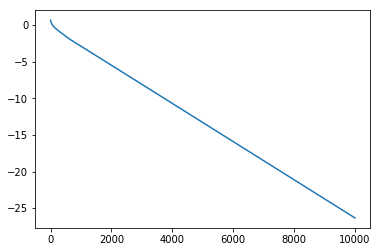

In [241]:
lst = np.array([i for i in range(10000)])
plt.plot(lst, d)

_Predictions on the basis of final weights_

In [221]:
y_pred

array([[1.31887547e-62],
       [5.98988731e-01],
       [5.99027964e-01],
       [2.26894941e-44]])

_Defining a threshold function to get outputs in understandable terms_

In [242]:
def threshold(x):
    res = []  
    for i in x:
        if(i > 0.00001):
            res.append(1)
        else:
            res.append(-1)
    return(res)

_Final results of the XOR Gate_

In [223]:
threshold(y_pred)

[-1, 1, 1, -1]